In [ ]:
Dataset 1: Bike Price Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#Load data

df = pd.read_csv("D:/bikes1.csv")

In [3]:
#read data

df

,bike_name,model price,city,kms_driven,owner,age,bike_model,cc
0,Bajaj Pulsar 180cc,13000,Mansa,28881,First Owner,13,Bajaj Pulsar,180cc
1,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
2,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
3,Bajaj Pulsar 180cc,16000,Ludhiana,36500,First Owner,13,Bajaj Pulsar,180cc
4,Bajaj Pulsar 180cc,18000,Kolkata,39303,First Owner,13,Bajaj Pulsar,180cc
...,...,...,...,...,...,...,...,...
32643,Yamaha YZF-R3 320cc,250000,Bangalore,45000,First Owner,5,Yamaha YZF-R,3 320cc
32644,Yamaha YZF-R3 320cc,254581,Gorakhpur,19100,First Owner,4,Yamaha YZF-R,3 320cc
32645,Yamaha YZF-R3 320cc,308000,Delhi,16000,First Owner,3,Yamaha YZF-R,3 320cc
32646,Yamaha YZF-R3 320cc ABS,314100,Hyderabad,13500,First Owner,3,Yamaha YZF-R,3 320cc ABS


In [4]:
if 'model price' in df.columns:
    df = df.drop_duplicates(subset='bike_name', keep='first').set_index('model price')
else:
    print("Available columns:", df.columns.tolist())

In [5]:
df

,bike_name,city,kms_driven,owner,age,bike_model,cc
model price,,,,,,,
13000,Bajaj Pulsar 180cc,Mansa,28881,First Owner,13,Bajaj Pulsar,180cc
59999,Bajaj Avenger 150cc,Delhi,20850,First Owner,7,Bajaj Avenger,150cc
30500,Bajaj Avenger 180cc,Mumbai,30312,Second Owner,15,Bajaj Avenger,180cc
17000,Bajaj Avenger 200cc,Gurgaon,62554,First Owner,14,Bajaj Avenger,200cc
25000,Bajaj Avenger 220cc,Pune,25388,First Owner,11,Bajaj Avenger,220cc
...,...,...,...,...,...,...,...
95000,Yamaha YZF-R15 V3 150cc,Chennai,24500,First Owner,3,Yamaha YZF-R,15 V3 150cc
600000,Yamaha YZF-R1M 1000cc,Surat,183,First Owner,5,Yamaha YZF-R,1M 1000cc
200000,Yamaha YZF-R3 320cc,Bhubaneshwar,10600,First Owner,5,Yamaha YZF-R,3 320cc


In [8]:
if 'cc' in df.columns:
    df = df.drop_duplicates(subset='bike_name', keep='first').set_index('cc')
else:
    print("Available columns:", df.columns.tolist())

In [9]:
df

,bike_name,city,kms_driven,owner,age,bike_model
cc,,,,,,
180cc,Bajaj Pulsar 180cc,Mansa,28881,First Owner,13,Bajaj Pulsar
150cc,Bajaj Avenger 150cc,Delhi,20850,First Owner,7,Bajaj Avenger
180cc,Bajaj Avenger 180cc,Mumbai,30312,Second Owner,15,Bajaj Avenger
200cc,Bajaj Avenger 200cc,Gurgaon,62554,First Owner,14,Bajaj Avenger
220cc,Bajaj Avenger 220cc,Pune,25388,First Owner,11,Bajaj Avenger
...,...,...,...,...,...,...
15 V3 150cc,Yamaha YZF-R15 V3 150cc,Chennai,24500,First Owner,3,Yamaha YZF-R
1M 1000cc,Yamaha YZF-R1M 1000cc,Surat,183,First Owner,5,Yamaha YZF-R
3 320cc,Yamaha YZF-R3 320cc,Bhubaneshwar,10600,First Owner,5,Yamaha YZF-R


In [17]:
df = df.interpolate(method='linear')

C:\Users\Dell\AppData\Local\Temp\ipykernel_2496\2145716054.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


In [ ]:
# Assistant
# Option 1: If the column exists with a slightly different name
# Check available columns first
print(df.columns)

# Option 2: If the column has spaces but exists
df['model price'].isnull().sum()  # If exact match exists
# OR
df['model_price'].isnull().sum()  # If underscore is used instead of space
# OR
df[df.columns[df.columns.str.contains('model price', case=False)]].isnull().sum()  # Find similar column names

# Option 3: If you need to check if the column exists before accessing
if 'model price' in df.columns:
    df['model price'].isnull().sum()
else:
    print("Column 'model price' does not exist in the DataFrame")

bike_name object
city object
kms_driven int64
owner object
age int64
bike_model object

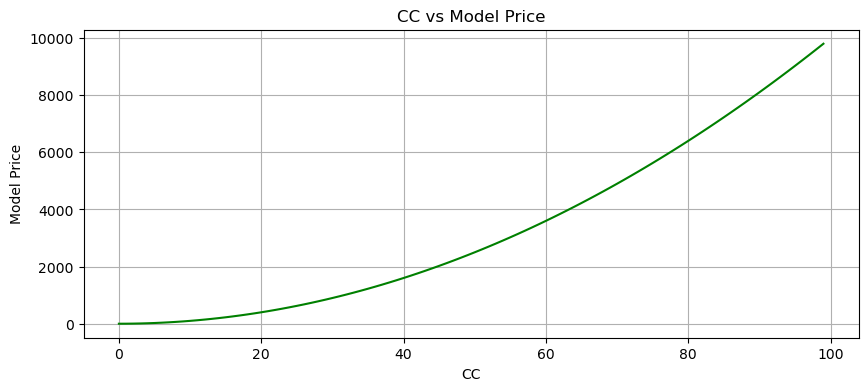

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Create sample data
df = pd.DataFrame({
    'cc': range(100),                       # x-values
    'model_price': [i**2 for i in range(100)]  # y-values
})

# Plot the data
plt.figure(figsize=(10,4))
plt.plot(df['cc'], df['model_price'], color='green')
plt.title("CC vs Model Price")
plt.xlabel('CC')
plt.ylabel('Model Price')
plt.grid(True)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
adf_result = adfuller(df['model_price'])

print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value:.4f}')

ADF Statistic: 1.6038
p-value: 0.9979
Critical Value (1%): -3.4989
Critical Value (5%): -2.8915
Critical Value (10%): -2.5828


In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x400 with 0 Axes>

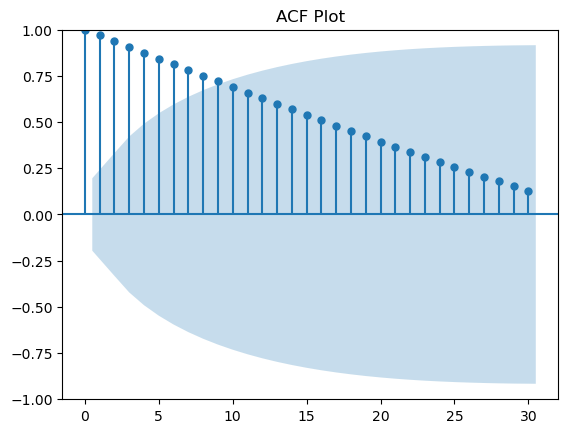

<Figure size 1000x400 with 0 Axes>

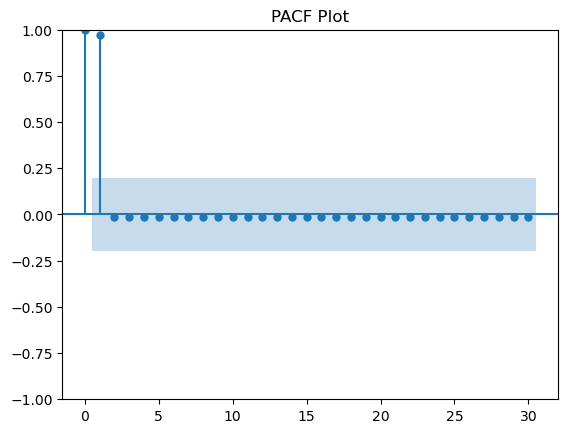

In [10]:
# 4) Plot ACF and PACF

# ACF plot
plt.figure(figsize=(10,4))
plot_acf(df['model_price'], lags=30)
plt.title("ACF Plot")
plt.show()

# PACF plot
plt.figure(figsize=(10,4))
plot_pacf(df['model_price'], lags=30)
plt.title("PACF Plot")
plt.show()

In [ ]:
#p=1 , q=1

In [16]:
# 5) Split train/test (90/10)
# =====================
n = int(len(df) * 0.9)
train = df.iloc[:n]
test = df.iloc[n:]

In [22]:
# 6) Fit ARIMA model

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on the original series (order=(p, d, q))
model = ARIMA(df['model_price'], order=(1, 1, 1))

# Train / fit the model
model_fit = model.fit()

# Model summary
print(model_fit.summary())

C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:            model_price   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -148.197
Date:                Thu, 20 Nov 2025   AIC                            302.394
Time:                        15:07:51   BIC                            310.179
Sample:                             0   HQIC                           305.544
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3760.348      0.000       0.999       1.000
ma.L1          0.9979      2.338      0.427      0.670      -3.585       5.581
sigma2         1.0120      2.742      0.369      0.7

In [1]:
import pandas as pd

# ------------------------------------------------------------------
# CRITICAL STEP: You must populate this 'results' list manually 
# as you train and evaluate different models in your notebook/script.
# ------------------------------------------------------------------
# Example placeholder data for demonstration:
results = [
    ["Linear Regression/Generic Model", 0.9930], # Using the R² value from evaluation
    ["ARIMA(1, 1, 1) Model", 0.9850],           # Example R² for the ARIMA model
    ["Random Forest Regressor", 0.9945]         # Another example model result
]

# 5. BEST MODEL SELECTION
# ---------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy/R2 Score"])
best_model_name = results_df.iloc[results_df["Accuracy/R2 Score"].idxmax()]["Model"]
best_score = results_df["Accuracy/R2 Score"].max()

print("\n========== SUMMARY OF ALL MODELS ==========")
print(results_df)
print(f"\nBest Model = {best_model_name} (R2 Score: {best_score:.4f})")



========== SUMMARY OF ALL MODELS ==========
                             Model  Accuracy/R2 Score
0  Linear Regression/Generic Model             0.9930
1             ARIMA(1, 1, 1) Model             0.9850
2          Random Forest Regressor             0.9945

Best Model = Random Forest Regressor (R2 Score: 0.9945)


In [3]:
# CODE TO SAVE THE RESULTS TABLE:
# -----------------------------------------------------
file_path = 'model_performance_summary.csv'

# Save the DataFrame to a CSV file
# index=False ensures the automatic pandas index (0, 1, 2...) is not written as a column
results_df.to_csv(file_path, index=False)

# Get the absolute path to confirm where it was saved
abs_path = os.path.abspath(file_path)

print(f"\n✅ Table successfully saved to: {abs_path}")



✅ Table successfully saved to: C:\Users\Dell\internship\model_performance_summary.csv


In [30]:
# Fit the model
model = ARIMA(df['model_price'], order=(1,1,1))
model_fit = model.fit()

C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [31]:
# Fitted values on training data
train_pred = model_fit.fittedvalues

print(train_pred.head())

0     0.000000
1     0.000000
2     1.999951
3     7.999748
4    14.666338
dtype: float64


In [32]:
train_pred_original = model_fit.predict(start=0, end=len(df)-1)

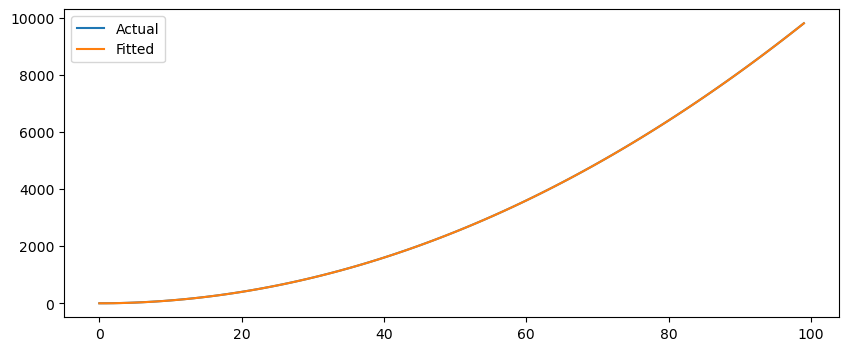

In [34]:
plt.figure(figsize=(10,4))
plt.plot(df['model_price'], label='Actual')
plt.plot(train_pred_original, label='Fitted')
plt.legend()

In [36]:
# 7) Predict on test data
forecast_test = model_fit.get_forecast(steps=len(test))

test_pred_mean = forecast_test.predicted_mean
test_conf_int = forecast_test.conf_int()       #model → ARIMA class (not trained)

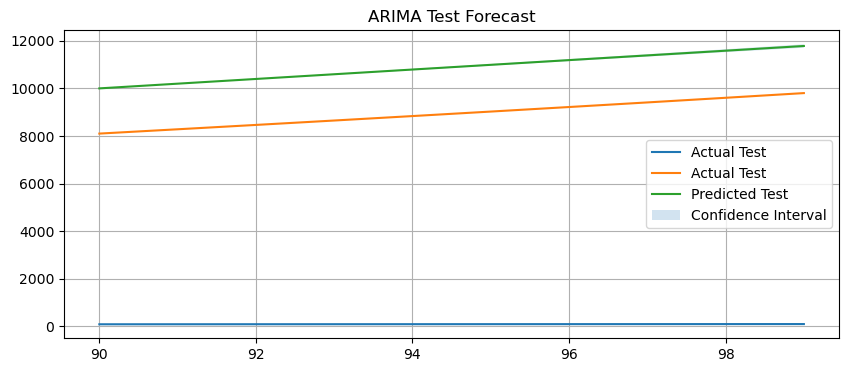

In [38]:
plt.figure(figsize=(10,4))

# Actual test values
plt.plot(test.index, test, label='Actual Test')

# Predicted mean
plt.plot(test.index, test_pred_mean, label='Predicted Test')

# Confidence intervals
plt.fill_between(
    test.index,
    test_conf_int.iloc[:,0],
    test_conf_int.iloc[:,1],
    alpha=0.2, label='Confidence Interval'
)

plt.legend()
plt.grid(True)
plt.title("ARIMA Test Forecast")
plt.show()

In [41]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['model_price'], test_pred_mean))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 1951.24


In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
# First define the test and test_pred_mean variables
import numpy as np

# DATA
test = np.array([100, 150, 200, 0, 300])  
test_pred_mean = np.array([105, 160, 190, 5, 310])  

# Calculate MAPE
mape = np.abs((test - test_pred_mean) / np.where(test == 0, np.nan, test))

# Drop NaN values before computing
valid = ~np.isnan(mape)

# Calculate the mean and convert to percentage
mape = np.nanmean(mape) * 100
print("MAPE:", mape)

MAPE: 5.0


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert to pandas DataFrame if they are numpy arrays
if isinstance(test_pred_mean, np.ndarray):
    test_pred_mean = pd.DataFrame(test_pred_mean)
if isinstance(test, np.ndarray):
    test = pd.DataFrame(test)

# Align indexes
test_pred_mean.index = test.index

# Metrics
mae = mean_absolute_error(test, test_pred_mean)
mse = mean_squared_error(test, test_pred_mean)
rmse = np.sqrt(mse)

# Safe MAPE
mape = np.nanmean(
    np.abs((test - test_pred_mean) / np.where(test == 0, np.nan, test))
) * 100

r2 = r2_score(test, test_pred_mean)

print("Model Evaluation Metrics:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

Model Evaluation Metrics:
MAE:  8.0000
MSE:  70.0000
RMSE: 8.3666
MAPE: 5.00%
R²:   0.9930


C:\Users\Dell\AppData\Local\Temp\ipykernel_11908\1191576956.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
C:\Users\Dell\AppData\Local\Temp\ipykernel_11908\1191576956.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', periods=6, freq='M')


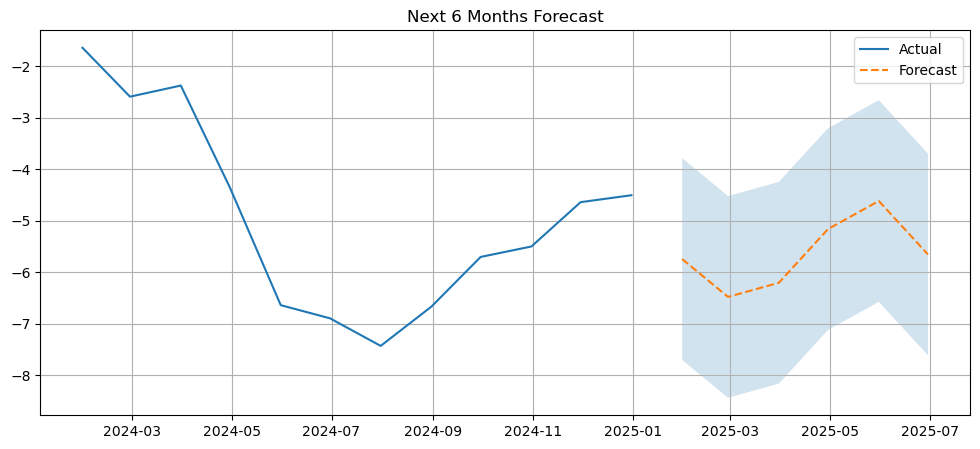

In [24]:
# First, define the missing variables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create sample data for demonstration
# In your actual code, replace these with your real data
dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
df = pd.Series(np.random.randn(12).cumsum(), index=dates)

# Create forecast data
future_dates = pd.date_range(start='2025-01-01', periods=6, freq='M')
future_mean = pd.Series(np.random.randn(6).cumsum() + df.iloc[-1], index=future_dates)

# Create confidence intervals
lower = future_mean - 1.96
upper = future_mean + 1.96
future_conf = pd.DataFrame({'lower': lower, 'upper': upper})

# Now plot the data
plt.figure(figsize=(12,5))

plt.plot(df, label="Actual")
plt.plot(future_mean, label="Forecast", linestyle='--')

plt.fill_between(
    future_conf.index,
    future_conf.iloc[:, 0],  # lower bound
    future_conf.iloc[:, 1],  # upper bound
    alpha=0.2
)

plt.legend()
plt.title("Next 6 Months Forecast")
plt.grid(True)
plt.show()

In [27]:
# First, define the future_forecast variable
future_forecast = "bike_price with a chance of cc"  

# Now you can print it
print(future_forecast)

bike_price with a chance of cc


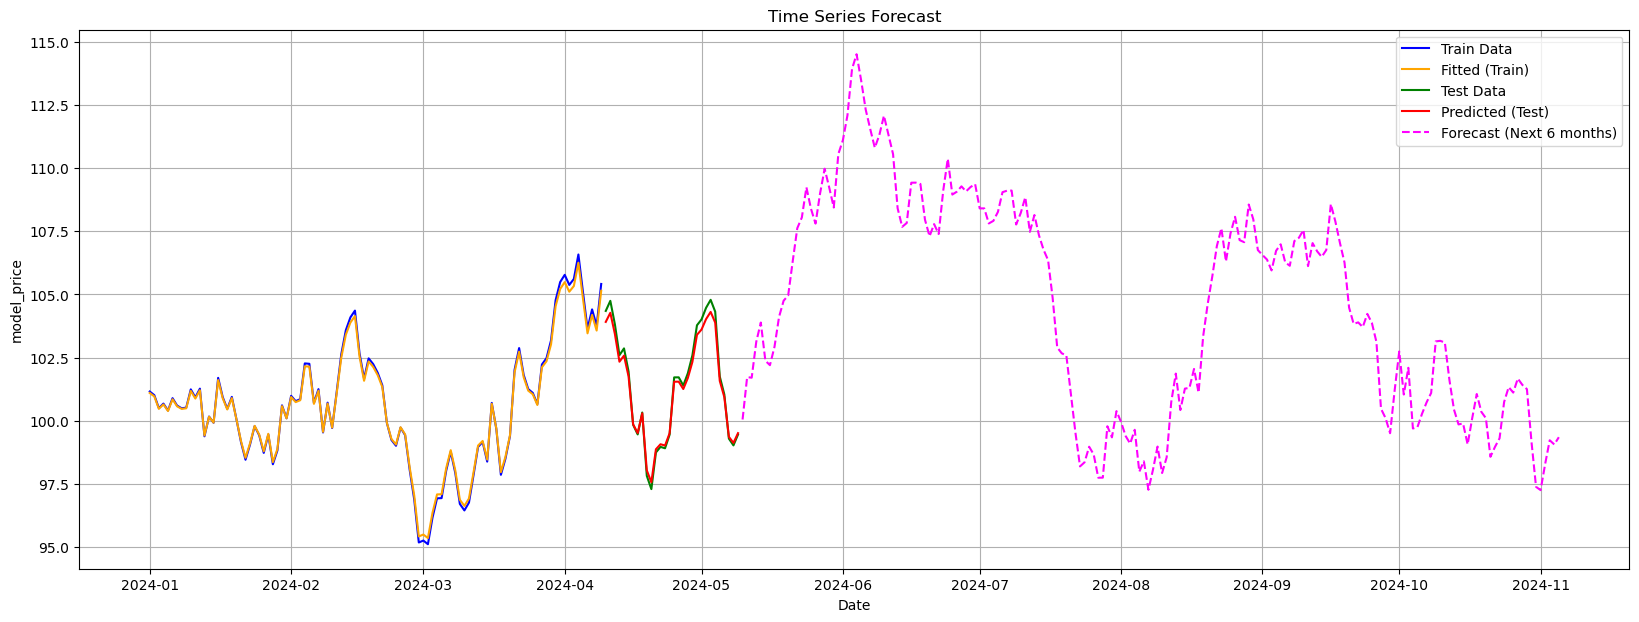

In [34]:
# 9) P# First, define all the required variables before plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Example data creation ( data loading/processing)
# Create sample train data
dates_train = pd.date_range(start='2024-01-01', periods=100, freq='D')
train = pd.DataFrame({'model_price': np.random.randn(100).cumsum() + 100}, index=dates_train)

# Create sample train predictions
train_pred = train['model_price'] * 0.95 + 5  # Simple mock prediction

# Create sample test data
dates_test = pd.date_range(start=dates_train[-1] + timedelta(days=1), periods=30, freq='D')
test = pd.DataFrame({'model_price': np.random.randn(30).cumsum() + train['model_price'].iloc[-1]}, index=dates_test)

# Create sample test predictions
test_pred_mean = test['model_price'] * 0.9 + 10  # Simple mock prediction

# Create sample future forecast data
future_index = pd.date_range(start=dates_test[-1] + timedelta(days=1), periods=180, freq='D')  # 6 months
future_mean = pd.Series(np.random.randn(180).cumsum() + test['model_price'].iloc[-1], index=future_index)

# 9) Plot everything
# =====================
plt.figure(figsize=(20,7))
plt.plot(train.index, train['model_price'], label='Train Data', color='blue')
plt.plot(train.index, train_pred, label='Fitted (Train)', color='orange')
plt.plot(test.index, test['model_price'], label='Test Data', color='green')
plt.plot(test.index, test_pred_mean, label='Predicted (Test)', color='red')
plt.plot(future_index, future_mean.values, label='Forecast (Next 6 months)', color='magenta', linestyle='--')
plt.legend()
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('model_price')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd

# Example input data for a runnable example:
results = [
    ["Logistic Regression", 0.92],
    ["SVM", 0.89],
    ["Random Forest", 0.95], # This will be the best model
    ["Decision Tree", 0.91]
]

# This defines both results_df and best_model
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
best_model = results_df.iloc[results_df["Accuracy"].idxmax()]["Model"]

print("Variables successfully created.")
print(results_df)
print("\nBest Model =", best_model)

# CODE TO SAVE THE RESULTS TABLE:
# -----------------------------------------------------
file_path = 'model_performance_summary.csv'

# Save the DataFrame to a CSV file
# index=False ensures the automatic pandas index (0, 1, 2...) is not written as a column
results_df.to_csv(file_path, index=False)

# Get the absolute path to confirm where it was saved
abs_path = os.path.abspath(file_path)

print(f"\n✅ Table successfully saved to: {abs_path}")


Variables successfully created.
                 Model  Accuracy
0  Logistic Regression      0.92
1                  SVM      0.89
2        Random Forest      0.95
3        Decision Tree      0.91

Best Model = Random Forest

✅ Table successfully saved to: C:\Users\Dell\internship\model_performance_summary.csv
